In [3]:
.libPaths("/u/project/eeskin2/k8688933/R/x86_64-pc-linux-gnu-library//3.5")
library(data.table)
library(RColorBrewer)
library(ggpubr)
library(Cairo)

Loading required package: ggplot2
Loading required package: magrittr


In [92]:
tissues = c("Muscle_Skeletal", "Skin_Sun_Exposed_Lower_leg", "Thyroid", "Whole_Blood")
dis = c("100kb", "50kb", "20kb")

In [43]:
file.dir = unlist(lapply(tissues, function(x) paste("/u/project/eeskin2/k8688933/rare_var/results/tss_20k_v8/sungoohw/", x, "/modified_fixed/maf0.05_regress_out_common_eqtls_", 
                                             dis, "/perm10k/all_weights", sep="")))

In [18]:
pvals = lapply(file.dir, function(x) rbindlist(lapply(dir(x, pattern="lrt", full.names=T), fread)))

In [23]:
saveRDS(pvals, "../regress_out_common_eqtl/maf05.regress.out.common.eqtls.pvals.rds")

In [44]:
pvals = readRDS("../regress_out_common_eqtl/maf05.regress.out.common.eqtls.pvals.rds")

In [45]:
pvals = lapply(pvals, na.omit)

In [46]:
names(pvals) = unlist(lapply(tissues, function(x) paste(x, dis, sep="_")))

In [47]:
orig.pvals.dir = paste("/u/project/eeskin2/k8688933/rare_var/results/tss_20k_v8/sungoohw/", tissues, "/modified_fixed/maf0.05/perm10k/all_weights", sep="")
pvals.orig = lapply(orig.pvals.dir, function(x) rbindlist(lapply(dir(x, pattern="lrt", full.names=T), fread)))

In [48]:
pvals.orig = lapply(pvals.orig, na.omit)

In [49]:
names(pvals.orig) = tissues

In [161]:
# selected.tissue = "Muscle_Skeletal"
# selected.dis = "100kb"
for (selected.tissue in tissues) {
    for (selected.dis in dis) {
        print(c(selected.tissue, selected.dis))
        selected.pvals = pvals[paste(selected.tissue, selected.dis, sep="_")]
        selected.pvals.orig = pvals.orig[selected.tissue]
        match.idx = match(selected.pvals[[1]]$Gene_ID, selected.pvals.orig[[1]]$Gene_ID)
        selected.pvals.orig[[1]] = selected.pvals.orig[[1]][match.idx, ]
        min.selected.pvals = apply(selected.pvals[[1]][, -1], 1, min)
        min.selected.pvals.orig = apply(selected.pvals.orig[[1]][, -1], 1, min)

        diff.pvals.all = selected.pvals[[1]][, -1] - selected.pvals.orig[[1]][, -1]

        CairoPDF(paste("../regress_out_common_eqtl/changes.p.values", selected.tissue, selected.dis, "pdf", sep="."), height = 7)
        par(mar=c(10,4,4,1)+0.1)
        boxplot(diff.pvals.all, col = brewer.pal(8, "Pastel2"), xaxt="n", pch=16, cex=0.5, ylab = "Changes in p-values", 
                main = paste("Regress out common eQTLs within", selected.dis, "\nfrom TSS in", selected.tissue))
        axis(side = 1, labels = F)
        text(x = 1:8,
             y = par("usr")[3]-0.08,
             labels = colnames(diff.pvals.all),
             xpd = NA,
             srt = 90,
             adj = 0.96,
             cex = 0.9)
        text(x = 4.5, y = par("usr")[3]-0.9, labels="Weights", xpd=NA, cex=1.1)
        dev.off()
    }
}

[1] "Muscle_Skeletal" "100kb"          
[1] "Muscle_Skeletal" "50kb"           
[1] "Muscle_Skeletal" "20kb"           
[1] "Skin_Sun_Exposed_Lower_leg" "100kb"                     
[1] "Skin_Sun_Exposed_Lower_leg" "50kb"                      
[1] "Skin_Sun_Exposed_Lower_leg" "20kb"                      
[1] "Thyroid" "100kb"  
[1] "Thyroid" "50kb"   
[1] "Thyroid" "20kb"   
[1] "Whole_Blood" "100kb"      
[1] "Whole_Blood" "50kb"       
[1] "Whole_Blood" "20kb"       


In [93]:
tissues = c("Whole_Blood", "Muscle_Skeletal", "Thyroid", "Skin_Sun_Exposed_Lower_leg")
qvals.orig = lapply(unlist(lapply(paste("/u/project/eeskin2/k8688933/rare_var/results/tss_20k_v8/result_summary/qvals", tissues, sep="/"), function(x) paste(x, "lrt", "q", sep="."))), fread)
count.egenes <- function(df) {
    egenes <- df$Gene_ID[apply(df, 1, function(x) { any(as.numeric(x[-1]) < 0.05) })]
    return(egenes)
}
egenes = lapply(qvals.orig, count.egenes)                                  
names(egenes) = tissues

In [58]:
# only RV eGenes
for (selected.tissue in tissues) {
    for (selected.dis in dis) {
        print(c(selected.tissue, selected.dis))
        selected.pvals = pvals[paste(selected.tissue, selected.dis, sep="_")][[1]]
        selected.pvals.orig = pvals.orig[selected.tissue][[1]]
        match.idx = match(selected.pvals$Gene_ID, selected.pvals.orig$Gene_ID)
        selected.pvals.orig = selected.pvals.orig[match.idx, ]
        

        diff.pvals.all = selected.pvals[which(selected.pvals$Gene_ID %in% egenes[selected.tissue][[1]]), -1] - selected.pvals.orig[which(selected.pvals.orig$Gene_ID %in% egenes[selected.tissue][[1]]), -1]

        CairoPDF(paste("../regress_out_common_eqtl/changes.p.values.rv.egenes", selected.tissue, selected.dis, "pdf", sep="."), height = 7)
        par(mar=c(10,4,4,1)+0.1)
        boxplot(diff.pvals.all, col = brewer.pal(8, "Pastel2"), xaxt="n", pch=16, cex=0.5, ylab = "Changes in p-values", 
                main = paste("Regress out common eQTLs within", selected.dis, "\nfrom TSS in", selected.tissue))
        axis(side = 1, labels = F)
        text(x = 1:8,
             y = par("usr")[3]-0.08,
             labels = colnames(diff.pvals.all),
             xpd = NA,
             srt = 90,
             adj = 0.96,
             cex = 0.9)
        text(x = 4.5, y = par("usr")[3]-0.9, labels="Weights", xpd=NA, cex=1.1)
        dev.off()
    }
}

[1] "Whole_Blood" "100kb"      
[1] "Whole_Blood" "50kb"       
[1] "Whole_Blood" "20kb"       
[1] "Muscle_Skeletal" "100kb"          
[1] "Muscle_Skeletal" "50kb"           
[1] "Muscle_Skeletal" "20kb"           
[1] "Thyroid" "100kb"  
[1] "Thyroid" "50kb"   
[1] "Thyroid" "20kb"   
[1] "Skin_Sun_Exposed_Lower_leg" "100kb"                     
[1] "Skin_Sun_Exposed_Lower_leg" "50kb"                      
[1] "Skin_Sun_Exposed_Lower_leg" "20kb"                      


In [104]:
# only RV eGenes - scatter plot
for (selected.tissue in tissues) {
    for (selected.dis in dis) {
        print(c(selected.tissue, selected.dis))
        selected.pvals = pvals[paste(selected.tissue, selected.dis, sep="_")][[1]]
        selected.pvals.orig = pvals.orig[selected.tissue][[1]]
        match.idx = match(selected.pvals$Gene_ID, selected.pvals.orig$Gene_ID)
        selected.pvals.orig = selected.pvals.orig[match.idx, ]
        
        # only consider original RV eGenes
        selected.pvals = selected.pvals[which(selected.pvals$Gene_ID %in% egenes[selected.tissue][[1]]), -1]
        selected.pvals.orig = selected.pvals.orig[which(selected.pvals.orig$Gene_ID %in% egenes[selected.tissue][[1]]), -1]

        df = as.data.frame(cbind(selected.pvals.orig$MAF, selected.pvals$MAF))
        colnames(df) = c("Original", "Regressed.out.eQTLs")
        CairoPDF(paste("../regress_out_common_eqtl/changes.p.values.rv.egenes.scatterplot", selected.tissue, selected.dis, "pdf", sep="."))
        p = ggscatter(df, x="Original", y="Regressed.out.eQTLs", title = paste("Regress out common eQTLs within", selected.dis, "\nfrom TSS in", selected.tissue), 
                  ylab = "p-values after regressing out eQTLs", xlab = "Original p-values")
        print(p)
        dev.off()
    }
}

[1] "Whole_Blood" "100kb"      
[1] "Whole_Blood" "50kb"       
[1] "Whole_Blood" "20kb"       
[1] "Muscle_Skeletal" "100kb"          
[1] "Muscle_Skeletal" "50kb"           
[1] "Muscle_Skeletal" "20kb"           
[1] "Thyroid" "100kb"  
[1] "Thyroid" "50kb"   
[1] "Thyroid" "20kb"   
[1] "Skin_Sun_Exposed_Lower_leg" "100kb"                     
[1] "Skin_Sun_Exposed_Lower_leg" "50kb"                      
[1] "Skin_Sun_Exposed_Lower_leg" "20kb"                      


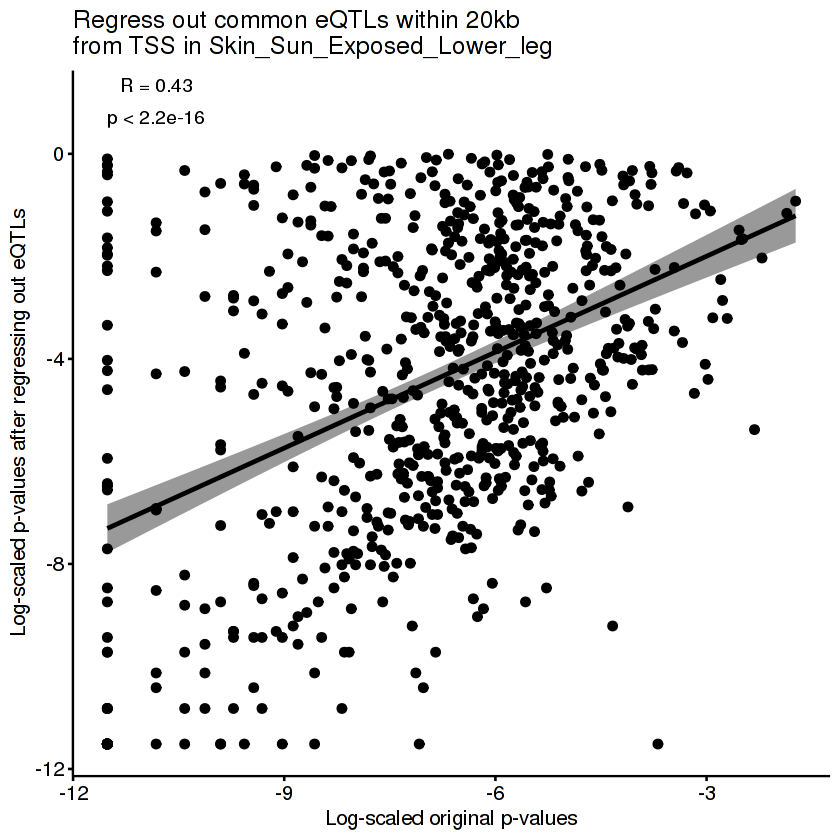

In [116]:
ggscatter(df, x="Original", y="Regressed.out.eQTLs", title = paste("Regress out common eQTLs within", selected.dis, "\nfrom TSS in", selected.tissue), 
                  ylab = "Log-scaled p-values after regressing out eQTLs", xlab = "Log-scaled original p-values", add = "reg.line", conf.int = T, cor.coef = T, 
          cor.coeff.args = list(method = "pearson", label.sep = "\n", label.y=1))

#### How RV eGenes changes

In [117]:
library(fdrtool)

In [118]:
tissues = c("Muscle_Skeletal", "Skin_Sun_Exposed_Lower_leg", "Thyroid", "Whole_Blood")
dis = c("100kb", "50kb", "20kb")

In [143]:
pvals = readRDS("../regress_out_common_eqtl/maf05.regress.out.common.eqtls.pvals.rds")
pvals = lapply(pvals, na.omit)
names(pvals) = unlist(lapply(tissues, function(x) paste(x, dis, sep="_")))

In [144]:
orig.pvals.dir = paste("/u/project/eeskin2/k8688933/rare_var/results/tss_20k_v8/sungoohw/", tissues, "/modified_fixed/maf0.05/perm10k/all_weights", sep="")
pvals.orig = lapply(orig.pvals.dir, function(x) rbindlist(lapply(dir(x, pattern="lrt", full.names=T), fread)))

In [145]:
pvals.orig = lapply(pvals.orig, na.omit)
names(pvals.orig) = tissues

In [146]:
# replace p-values from regressing out 
new.pvals.list = pvals
for (selected.tissue in tissues) {
    for (selected.dis in dis) {
        print(c(selected.tissue, selected.dis))
        tag.name = paste(selected.tissue, selected.dis, sep="_")
        selected.pvals = pvals[tag.name][[1]]
        selected.pvals.orig = pvals.orig[selected.tissue][[1]]
        match.idx = match(selected.pvals$Gene_ID, selected.pvals.orig$Gene_ID)
        selected.pvals.orig[match.idx, ] = selected.pvals
        new.pvals.list[tag.name][[1]] = selected.pvals.orig
    }
}

[1] "Muscle_Skeletal" "100kb"          
[1] "Muscle_Skeletal" "50kb"           
[1] "Muscle_Skeletal" "20kb"           
[1] "Skin_Sun_Exposed_Lower_leg" "100kb"                     
[1] "Skin_Sun_Exposed_Lower_leg" "50kb"                      
[1] "Skin_Sun_Exposed_Lower_leg" "20kb"                      
[1] "Thyroid" "100kb"  
[1] "Thyroid" "50kb"   
[1] "Thyroid" "20kb"   
[1] "Whole_Blood" "100kb"      
[1] "Whole_Blood" "50kb"       
[1] "Whole_Blood" "20kb"       


In [10]:
convert.q <- function(df) {
    for (j in 2:ncol(df)) {
        df[, j] = fdrtool(df[, j], statistic="pvalue", plot=F)$qval
    }
    return(df)
}

In [11]:
new.qvals.list = lapply(new.pvals.list, function(x) convert.q(as.data.frame(x)))

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
St

In [123]:
count.egenes <- function(df) {
    egenes <- df$Gene_ID[apply(df, 1, function(x) { any(as.numeric(x[-1]) < 0.05) })]
    return(egenes)
}

count.genes.thres <- function(df, p.thres) {
    genes <- df$Gene_ID[apply(df, 1, function(x) { any(as.numeric(x[-1]) < p.thres) })]
    return(genes)
}

In [13]:
new.egenes.list = lapply(new.qvals.list, count.egenes)

In [14]:
lapply(new.egenes.list, length)

$Muscle_Skeletal_100kb
[1] 688

$Muscle_Skeletal_50kb
[1] 871

$Muscle_Skeletal_20kb
[1] 712

$Skin_Sun_Exposed_Lower_leg_100kb
[1] 768

$Skin_Sun_Exposed_Lower_leg_50kb
[1] 799

$Skin_Sun_Exposed_Lower_leg_20kb
[1] 943

$Thyroid_100kb
[1] 947

$Thyroid_50kb
[1] 972

$Thyroid_20kb
[1] 1084

$Whole_Blood_100kb
[1] 681

$Whole_Blood_50kb
[1] 761

$Whole_Blood_20kb
[1] 667

In [15]:
qvals.orig = lapply(pvals.orig, function(x) convert.q(as.data.frame(x)))

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
St

In [16]:
orig.egenes.list = lapply(qvals.orig, count.egenes)

In [17]:
lapply(orig.egenes.list, length)

$Muscle_Skeletal
[1] 1347

$Skin_Sun_Exposed_Lower_leg
[1] 1458

$Thyroid
[1] 1943

$Whole_Blood
[1] 1248

In [159]:
lapply(lapply(new.pvals.list, function(x) count.genes.thres(x, 1e-3)), length)

$Muscle_Skeletal_100kb
[1] 623

$Muscle_Skeletal_50kb
[1] 699

$Muscle_Skeletal_20kb
[1] 641

$Skin_Sun_Exposed_Lower_leg_100kb
[1] 690

$Skin_Sun_Exposed_Lower_leg_50kb
[1] 709

$Skin_Sun_Exposed_Lower_leg_20kb
[1] 776

$Thyroid_100kb
[1] 795

$Thyroid_50kb
[1] 797

$Thyroid_20kb
[1] 857

$Whole_Blood_100kb
[1] 614

$Whole_Blood_50kb
[1] 652

$Whole_Blood_20kb
[1] 605

In [157]:
lapply(lapply(pvals.orig, function(x) count.genes.thres(x, 1e-3)), length)

$Muscle_Skeletal
[1] 845

$Skin_Sun_Exposed_Lower_leg
[1] 981

$Thyroid
[1] 1135

$Whole_Blood
[1] 831

In [29]:
saveRDS(new.egenes.list, "new.egenes.list.regressed.out.eqtls.rds")
saveRDS(orig.egenes.list, "orig.egenes.list.regressed.out.eqtls.rds")
saveRDS(new.qvals.list, "new.qvals.list.regressed.out.eqtls.rds")
saveRDS(qvals.orig, "qvals.orig.rds")

#### Only novel eGenes

In [78]:
new.egenes.list = readRDS("new.egenes.list.regressed.out.eqtls.rds")
orig.egenes.list = readRDS("orig.egenes.list.regressed.out.eqtls.rds")

In [79]:
cv.egenes = lapply(paste("zcat ", "/u/project/eeskin2/k8688933/meta-tissue/gtex_v8_eqtls/GTEx_Analysis_v8_eQTL/", tissues, ".v8.egenes.txt.gz", sep=""), fread)
names(cv.egenes) = tissues
cv.egenes.names = lapply(cv.egenes, function(x) x$gene_id[x$qval < 0.05])

Taking input= as a system command ('zcat /u/project/eeskin2/k8688933/meta-tissue/gtex_v8_eqtls/GTEx_Analysis_v8_eQTL/Muscle_Skeletal.v8.egenes.txt.gz') and a variable has been used in the expression passed to `input=`. Please use fread(cmd=...). There is a security concern if you are creating an app, and the app could have a malicious user, and the app is not running in a secure environment; e.g. the app is running as root. Please read item 5 in the NEWS file for v1.11.6 for more information and for the option to suppress this message.
Taking input= as a system command ('zcat /u/project/eeskin2/k8688933/meta-tissue/gtex_v8_eqtls/GTEx_Analysis_v8_eQTL/Skin_Sun_Exposed_Lower_leg.v8.egenes.txt.gz') and a variable has been used in the expression passed to `input=`. Please use fread(cmd=...). There is a security concern if you are creating an app, and the app could have a malicious user, and the app is not running in a secure environment; e.g. the app is running as root. Please read item 5 

In [80]:
novel.egenes.orig = orig.egenes.list
novel.egenes.new = new.egenes.list
remain.egenes.new = new.egenes.list
for (i in tissues) {
    novel.egenes.orig[i][[1]] = setdiff(novel.egenes.orig[i][[1]], cv.egenes.names[i][[1]])
    for (d in dis) {
        print(c(i, d))
        tag.name = paste(i, d, sep="_")
        novel.egenes.new[tag.name][[1]] = setdiff(novel.egenes.new[tag.name][[1]], cv.egenes.names[i][[1]])
        remain.egenes.new[tag.name][[1]] = intersect(novel.egenes.new[tag.name][[1]], novel.egenes.orig[i][[1]])
    }
}

[1] "Muscle_Skeletal" "100kb"          
[1] "Muscle_Skeletal" "50kb"           
[1] "Muscle_Skeletal" "20kb"           
[1] "Skin_Sun_Exposed_Lower_leg" "100kb"                     
[1] "Skin_Sun_Exposed_Lower_leg" "50kb"                      
[1] "Skin_Sun_Exposed_Lower_leg" "20kb"                      
[1] "Thyroid" "100kb"  
[1] "Thyroid" "50kb"   
[1] "Thyroid" "20kb"   
[1] "Whole_Blood" "100kb"      
[1] "Whole_Blood" "50kb"       
[1] "Whole_Blood" "20kb"       


In [81]:
lapply(novel.egenes.orig, length)

$Muscle_Skeletal
[1] 135

$Skin_Sun_Exposed_Lower_leg
[1] 123

$Thyroid
[1] 166

$Whole_Blood
[1] 128

In [82]:
lapply(novel.egenes.new, length)

$Muscle_Skeletal_100kb
[1] 81

$Muscle_Skeletal_50kb
[1] 97

$Muscle_Skeletal_20kb
[1] 85

$Skin_Sun_Exposed_Lower_leg_100kb
[1] 82

$Skin_Sun_Exposed_Lower_leg_50kb
[1] 84

$Skin_Sun_Exposed_Lower_leg_20kb
[1] 93

$Thyroid_100kb
[1] 100

$Thyroid_50kb
[1] 102

$Thyroid_20kb
[1] 109

$Whole_Blood_100kb
[1] 83

$Whole_Blood_50kb
[1] 89

$Whole_Blood_20kb
[1] 79

In [72]:
# ensure no novel eGenes get eQTL regressed out
pvals = readRDS("../regress_out_common_eqtl/maf05.regress.out.common.eqtls.pvals.rds")
pvals = lapply(pvals, na.omit)
names(pvals) = unlist(lapply(tissues, function(x) paste(x, dis, sep="_")))

In [73]:
orig.pvals.dir = paste("/u/project/eeskin2/k8688933/rare_var/results/tss_20k_v8/sungoohw/", tissues, "/modified_fixed/maf0.05/perm10k/all_weights", sep="")
pvals.orig = lapply(orig.pvals.dir, function(x) rbindlist(lapply(dir(x, pattern="lrt", full.names=T), fread)))

In [74]:
pvals.orig = lapply(pvals.orig, na.omit)
names(pvals.orig) = tissues

In [90]:
diff.pvals.list = pvals
for (selected.tissue in tissues) {
    for (selected.dis in dis) {
        print(c(selected.tissue, selected.dis))
        tag.name = paste(selected.tissue, selected.dis, sep="_")
        selected.pvals = pvals[tag.name][[1]]
        selected.pvals.orig = pvals.orig[selected.tissue][[1]]
        selected.novel.egenes.orig = novel.egenes.orig[selected.tissue][[1]]
        
        # ensure there are no novel eGenes get eQTL regressed out
        # novel RV eGenes have no nearby eQTLs
        print(c(all(selected.novel.egenes.orig %in% selected.pvals$Gene_ID),
                any(selected.novel.egenes.orig %in% selected.pvals$Gene_ID),
                all(selected.novel.egenes.orig %in% selected.pvals.orig$Gene_ID)))
#         diff.pvals.list[tag.name][[1]] = selected.pvals[which(selected.pvals$Gene_ID %in% selected.novel.egenes.orig), -1] - selected.pvals.orig[which(selected.pvals.orig$Gene_ID %in% selected.novel.egenes.orig), -1]
    }
}

[1] "Muscle_Skeletal" "100kb"          
[1] FALSE FALSE  TRUE
[1] "Muscle_Skeletal" "50kb"           
[1] FALSE FALSE  TRUE
[1] "Muscle_Skeletal" "20kb"           
[1] FALSE FALSE  TRUE
[1] "Skin_Sun_Exposed_Lower_leg" "100kb"                     
[1] FALSE FALSE  TRUE
[1] "Skin_Sun_Exposed_Lower_leg" "50kb"                      
[1] FALSE FALSE  TRUE
[1] "Skin_Sun_Exposed_Lower_leg" "20kb"                      
[1] FALSE FALSE  TRUE
[1] "Thyroid" "100kb"  
[1] FALSE FALSE  TRUE
[1] "Thyroid" "50kb"   
[1] FALSE FALSE  TRUE
[1] "Thyroid" "20kb"   
[1] FALSE FALSE  TRUE
[1] "Whole_Blood" "100kb"      
[1] FALSE FALSE  TRUE
[1] "Whole_Blood" "50kb"       
[1] FALSE FALSE  TRUE
[1] "Whole_Blood" "20kb"       
[1] FALSE FALSE  TRUE


#### SKAT-O

In [132]:
tissues = c("Muscle_Skeletal", "Skin_Sun_Exposed_Lower_leg", "Thyroid", "Whole_Blood")
dis = c("100kb", "50kb", "20kb")

In [47]:
file.dir = unlist(lapply(tissues, function(x) paste("/u/project/eeskin2/k8688933/rare_var/results/tss_20k_v8/sungoohw/", x, "/modified_fixed/maf0.05_regress_out_common_eqtls_", 
                                             dis, "/perm10k/all_weights", sep="")))

In [48]:
pvals = lapply(file.dir, function(x) rbindlist(lapply(dir(x, pattern="skat", full.names=T), fread)))

In [49]:
pvals = lapply(pvals, na.omit)

In [50]:
names(pvals) = unlist(lapply(tissues, function(x) paste(x, dis, sep="_")))

In [51]:
saveRDS(pvals, "pvals.skat.regressed.out.eqtls.rds")

In [133]:
pvals = readRDS("pvals.skat.regressed.out.eqtls.rds")

In [134]:
orig.pvals.dir = paste("/u/project/eeskin2/k8688933/rare_var/results/tss_20k_v8/sungoohw/", tissues, "/modified_fixed/maf0.05/perm10k/all_weights", sep="")
pvals.orig = lapply(orig.pvals.dir, function(x) rbindlist(lapply(dir(x, pattern="skat", full.names=T), fread)))

In [135]:
pvals.orig = lapply(pvals.orig, na.omit)
names(pvals.orig) = tissues

In [136]:
# replace p-values from regressing out 
new.pvals.list = pvals
for (selected.tissue in tissues) {
    for (selected.dis in dis) {
        print(c(selected.tissue, selected.dis))
        tag.name = paste(selected.tissue, selected.dis, sep="_")
        selected.pvals = pvals[tag.name][[1]]
        selected.pvals.orig = pvals.orig[selected.tissue][[1]]
        match.idx = match(selected.pvals$Gene_ID, selected.pvals.orig$Gene_ID)
        selected.pvals.orig[match.idx, ] = selected.pvals
        new.pvals.list[tag.name][[1]] = selected.pvals.orig
    }
}

[1] "Muscle_Skeletal" "100kb"          
[1] "Muscle_Skeletal" "50kb"           
[1] "Muscle_Skeletal" "20kb"           
[1] "Skin_Sun_Exposed_Lower_leg" "100kb"                     
[1] "Skin_Sun_Exposed_Lower_leg" "50kb"                      
[1] "Skin_Sun_Exposed_Lower_leg" "20kb"                      
[1] "Thyroid" "100kb"  
[1] "Thyroid" "50kb"   
[1] "Thyroid" "20kb"   
[1] "Whole_Blood" "100kb"      
[1] "Whole_Blood" "50kb"       
[1] "Whole_Blood" "20kb"       


In [53]:
convert.q <- function(df) {
    for (j in 2:ncol(df)) {
        df[, j] = fdrtool(df[, j], statistic="pvalue", plot=F)$qval
    }
    return(df)
}

In [54]:
new.qvals.list = lapply(new.pvals.list, function(x) convert.q(as.data.frame(x)))

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
St

In [55]:
count.egenes <- function(df) {
    egenes <- df$Gene_ID[apply(df, 1, function(x) { any(as.numeric(x[-1]) < 0.05) })]
    return(egenes)
}

In [56]:
new.egenes.list = lapply(new.qvals.list, count.egenes)

In [59]:
tissues = c("Whole_Blood", "Muscle_Skeletal", "Thyroid", "Skin_Sun_Exposed_Lower_leg")
qvals.orig = lapply(unlist(lapply(paste("/u/project/eeskin2/k8688933/rare_var/results/tss_20k_v8/result_summary/qvals", tissues, sep="/"), 
                                  function(x) paste(x, "skat", "q", sep="."))), fread)
count.egenes <- function(df) {
    egenes <- df$Gene_ID[apply(df, 1, function(x) { any(as.numeric(x[-1]) < 0.05) })]
    return(egenes)
}
orig.egenes.list = lapply(qvals.orig, count.egenes)                                  
names(orig.egenes.list) = tissues

In [60]:
novel.egenes.orig = orig.egenes.list
novel.egenes.new = new.egenes.list
remain.egenes.new = new.egenes.list
for (i in tissues) {
    novel.egenes.orig[i][[1]] = setdiff(novel.egenes.orig[i][[1]], cv.egenes.names[i][[1]])
    for (d in dis) {
        print(c(i, d))
        tag.name = paste(i, d, sep="_")
        novel.egenes.new[tag.name][[1]] = setdiff(novel.egenes.new[tag.name][[1]], cv.egenes.names[i][[1]])
        remain.egenes.new[tag.name][[1]] = intersect(novel.egenes.new[tag.name][[1]], novel.egenes.orig[i][[1]])
    }
}

[1] "Whole_Blood" "100kb"      
[1] "Whole_Blood" "50kb"       
[1] "Whole_Blood" "20kb"       
[1] "Muscle_Skeletal" "100kb"          
[1] "Muscle_Skeletal" "50kb"           
[1] "Muscle_Skeletal" "20kb"           
[1] "Thyroid" "100kb"  
[1] "Thyroid" "50kb"   
[1] "Thyroid" "20kb"   
[1] "Skin_Sun_Exposed_Lower_leg" "100kb"                     
[1] "Skin_Sun_Exposed_Lower_leg" "50kb"                      
[1] "Skin_Sun_Exposed_Lower_leg" "20kb"                      


In [63]:
lapply(new.egenes.list, length)

$Muscle_Skeletal_100kb
[1] 574

$Muscle_Skeletal_50kb
[1] 729

$Muscle_Skeletal_20kb
[1] 608

$Skin_Sun_Exposed_Lower_leg_100kb
[1] 506

$Skin_Sun_Exposed_Lower_leg_50kb
[1] 616

$Skin_Sun_Exposed_Lower_leg_20kb
[1] 758

$Thyroid_100kb
[1] 688

$Thyroid_50kb
[1] 728

$Thyroid_20kb
[1] 835

$Whole_Blood_100kb
[1] 553

$Whole_Blood_50kb
[1] 649

$Whole_Blood_20kb
[1] 534

In [64]:
lapply(orig.egenes.list, length)

$Whole_Blood
[1] 1349

$Muscle_Skeletal
[1] 1348

$Thyroid
[1] 1862

$Skin_Sun_Exposed_Lower_leg
[1] 1536

In [61]:
lapply(novel.egenes.orig, length)

$Whole_Blood
[1] 119

$Muscle_Skeletal
[1] 113

$Thyroid
[1] 116

$Skin_Sun_Exposed_Lower_leg
[1] 98

In [62]:
lapply(novel.egenes.new, length)

$Muscle_Skeletal_100kb
[1] 67

$Muscle_Skeletal_50kb
[1] 76

$Muscle_Skeletal_20kb
[1] 70

$Skin_Sun_Exposed_Lower_leg_100kb
[1] 48

$Skin_Sun_Exposed_Lower_leg_50kb
[1] 64

$Skin_Sun_Exposed_Lower_leg_20kb
[1] 76

$Thyroid_100kb
[1] 67

$Thyroid_50kb
[1] 69

$Thyroid_20kb
[1] 75

$Whole_Blood_100kb
[1] 66

$Whole_Blood_50kb
[1] 75

$Whole_Blood_20kb
[1] 61

In [141]:
lapply(lapply(new.pvals.list, function(x) count.genes.thres(x, 1e-5)), length)

$Muscle_Skeletal_100kb
[1] 156

$Muscle_Skeletal_50kb
[1] 175

$Muscle_Skeletal_20kb
[1] 162

$Skin_Sun_Exposed_Lower_leg_100kb
[1] 143

$Skin_Sun_Exposed_Lower_leg_50kb
[1] 152

$Skin_Sun_Exposed_Lower_leg_20kb
[1] 187

$Thyroid_100kb
[1] 167

$Thyroid_50kb
[1] 167

$Thyroid_20kb
[1] 190

$Whole_Blood_100kb
[1] 135

$Whole_Blood_50kb
[1] 138

$Whole_Blood_20kb
[1] 138

In [152]:
lapply(lapply(pvals.orig, function(x) count.genes.thres(x, 1e-5)), length)

$Muscle_Skeletal
[1] 190

$Skin_Sun_Exposed_Lower_leg
[1] 209

$Thyroid
[1] 257

$Whole_Blood
[1] 198

In [65]:
saveRDS(new.egenes.list, "new.egenes.list.regressed.out.eqtls.skat.rds")
saveRDS(orig.egenes.list, "orig.egenes.list.regressed.out.eqtls.skat.rds")
saveRDS(new.qvals.list, "new.qvals.list.regressed.out.eqtls.skat.rds")

### Genes regressed out

In [66]:
tissues = c("Muscle_Skeletal", "Skin_Sun_Exposed_Lower_leg", "Thyroid", "Whole_Blood")
dis = c("100kb", "50kb", "20kb")

In [70]:
egenes.with.eqtls = lapply(unlist(lapply(tissues, function(x) paste("/u/project/eeskin2/k8688933/rare_var/analysis/", x, ".v8.common_eqtls.tss_", dis, ".csv", sep=""))), fread)
names(egenes.with.eqtls) = unlist(lapply(tissues, function(x) paste(x, dis, sep="_")))

In [69]:
lapply(egenes.with.eqtls, function(x) x$)

[1] "Muscle_Skeletal_100kb"            "Muscle_Skeletal_50kb"            
 [3] "Muscle_Skeletal_20kb"             "Skin_Sun_Exposed_Lower_leg_100kb"
 [5] "Skin_Sun_Exposed_Lower_leg_50kb"  "Skin_Sun_Exposed_Lower_leg_20kb" 
 [7] "Thyroid_100kb"                    "Thyroid_50kb"                    
 [9] "Thyroid_20kb"                     "Whole_Blood_100kb"               
[11] "Whole_Blood_50kb"                 "Whole_Blood_20kb"